# Correlation vs Linear regression

- Correlation (-1 to 1) is used to find <u>strength and direction</u> of linear relationship between two variables

- In Simple linear regression we <u>quantify and model</u> this linear relationship
  - By fitting a straight line to data points
  

# The LR Model

Assignment: The VP of Engagement asks you to build the model describing the relationship between a DataSciencester user’s number of friends and the amount of time the user spends on the site each day.

- we are convinced that its a linear relationship looking at correlation
- therefore, let's start with a linear model

## Linear model hypothesis

\begin{equation}
y_i = \beta x_i + \alpha + \epsilon_i
\tag{1}
\end{equation}


>$y_i$ is the number of minutes user i spends on the site daily  
>$x_i$ is the number of friends user i has  
>$ε_i$ is a (hopefully small) error term representing the fact that there are other factors not accounted for by this simple model

## Steps to train the simple LR model

### 1. Using normal equations (No iterations) - Least squares fit

Find optimized $\alpha$ and $\beta$ from given x,y using formula:
   \begin{equation}
   \beta = \frac{r \sigma_y}{\sigma_x}
   \tag{2}
   \end{equation}
   >$r$ = correlation(x,y)  
   >$\sigma_y$ = Standard deviation of y  
   >$\sigma_x$ = Standard deviation of x

   \begin{equation}
   \alpha =  \bar{y} - \beta \bar{x}
   \tag{3}
   \end{equation}
   > derived from equation (1)

- Used when only one predictor ($x$) is present
- Its a quick solution
- Lower accuracy
- Error is not minimized iteratively

### 2. Using error minimization through Gradient Descent

1. Predict $y_i$ from $ \alpha , \beta, x_i$ using,
   \begin{equation}
   y_{predicted} = \beta x_i + \alpha
   \tag{4}
   \end{equation}

2. Calculate error between $y_{predicted}$ and given $y_{i}$ and calculate <u>sum of squared errors</u> (because + and - errors may cancel out each other)
   \begin{equation}
   error = y_{predicted} - y_{i}
   \tag{5}
   \end{equation}

4. Find R-squared (Coefficient of determination) which measures the fraction of the total variation in the dependent variable that is captured by the model
5. Use **gradient descent** - minimize loss function ($error^2$) and get optimum values of $\alpha$ and $\beta$ for linear regression model

# Using normal equations - Least Squares Fit

(a) **Using calculus the optimized $\alpha$ and $\beta$ are given by using equation 2 and 3**

In [1]:
from typing import List, Tuple
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: List[float], y: List[float]) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x,y) * standard_deviation(y) /standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Let's think about why this might be a reasonable solution. 

> * The choice of $\alpha$ simply says that when we see the average value of the independent variable x, we predict the average value of the dependent variable y.  
> * The choice of $\beta$ means that when the input value increases by standard_deviation(x), the prediction then increases by `correlation(x, y) * standard_deviation(y)`.  
> In the case where x and y are perfectly correlated, a one-standard-deviation increase in x results in a one-standard-deviation-of-y increase in the prediction.    
> * When they’re perfectly anticorrelated, the increase in x results in a decrease in the prediction.
> * And when the correlation is 0, beta is 0, which means that changes in x don’t affect the prediction at all

In [2]:
# quick test

# get a sample data
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

alpha, beta = least_squares_fit(x, y) 
assert -5.2 < alpha < -4.8
assert 2.8 < beta < 3.2


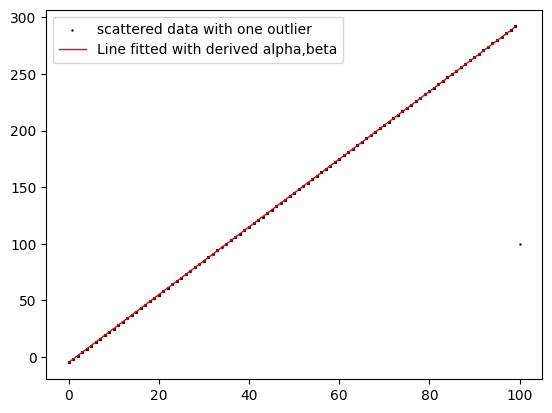

In [3]:
# Let's check with outliers

# generate data with outlier
import matplotlib.pyplot as plt
import random

random.seed(10)
x = [random.choice(range(100)) for _ in range(1000)]
y = [(3 * i  - 5) for i in x]

# the optimized alpha and beta are
assert least_squares_fit(x, y) == (-5.3328550991810175, 3.0066259599717533)

#adding an outlier in sample data
x.append(100) 
y.append(100)

# Now check what's the alpha and beta with outlier data
alpha, beta = least_squares_fit(x, y)

# Let's fit another data with above determined alpha, beta
X = [i for i in range(100)]
Y = [beta * i + alpha for i in X]

plt.scatter(x,y, c= 'black', s =0.5, label = 'scattered data with one outlier')
plt.plot(X,Y, lw = 1, c= 'red', label = 'Line fitted with derived alpha,beta')
plt.legend()

#print(alpha, beta) # Optimized at -5 and 3

- For large number of samples the values of alpha and beta will be optimized to -5 and 3 here. 

- But for low number of samples it will be highly deviating

- You can run above for less number of data in dataset and see how the alpha and beta are deviated from real values.

## R-squared/ Coefficient of Determination

-  It is a commonly used metric to evaluate the goodness of fit of a regression model.

-  Higher values of $R^2$ indicate a better fit, while lower values indicate a poorer fit.

- However, $R^2$ alone may not provide a complete picture of the model's performance, so it's often used in conjunction with other metrics for model evaluation.

- It is given by:
  $$R^2 =  1 - \frac{\sum{(y_p - y)^2}}{\sum{(y - \bar{y})^2}} = 1 - \frac{\text{sum of sqerrors}(alpha, beta, x, y)}{\text{total sum of squares}(y)}$$


**Predict $y$** using $\alpha , \beta , x$

- Assuming we have determined \alpha and \beta, we can make predictions as following:

In [4]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

**Calculate error** from known y value and predicted y value

- how do we calculate $\alpha$ and $\beta$ here?
 > Well, any choice of alpha and beta gives us a predicted output for each input x_i

In [5]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

What we’d really like to know is the **total error over the entire dataset**. But we don’t want to just add the errors—if the prediction for x_1 is too high and the prediction for x_2 is too low, the errors may just cancel out.
So instead **we add up the squared errors**:

In [6]:
def sum_of_sqerrors(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    return sum((error(alpha, beta, x_i, y_i) ** 2) for x_i, y_i in zip(x,y))

In [7]:
from scratch.statistics import de_mean

def total_sum_of_squares(y: List[float]) -> float:
    """
    the total squared variation of y_i's from their mean
    """
    return sum(v ** 2 for v in de_mean(y))
    
def r_squared(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

r = r_squared(alpha, beta, x, y)
print(r)

0.994925694833945


- for optimized $\alpha$ and $\beta$, sum of square errors -> 0

- thus $R^2$ -> 1

- higher the $R^2$, better the model fits

# Using Gradient Descent - minimize loss function

Steps:
1. Select random $\alpha$ and $\beta$ and a learning rate
2. Minimize loss function for optimized $\alpha$ and $\beta$
3. For this - find gradient of loss function wrt $\alpha$ and $\beta$
4. Update gradient step size using function gradient_step from scratch.gradient_descent
5. Iterate and optimize $\alpha$, $\beta$



Let's say, $$ \theta = [\alpha, \beta]$$

In [66]:
import random

random.seed(0)
x = [random.choice(range(100)) for _ in range(1000)]
y = [(3 * i  - 5) for i in x]

In [70]:
import random
from scratch.gradient_descent import gradient_step
import tqdm

random.seed(0)
theta = [random.random(), random.random()] # choose random value to start

print(theta)
learning_rate = 0.0000003 # set step size

with tqdm.trange(40000) as t:
    for i in t:
        alpha, beta = theta
        # print(alpha,beta)
        
        # Partial derivate of loss function (error^2) wrt alpha
        grad_alpha = sum(2 * error(alpha, beta, x_i, y_i)
                 for x_i, y_i in zip(x,y))

        grad_beta = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                        for x_i, y_i in zip(x,y))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,x,y)
        if i % 10 == 0:
            t.set_description(f"alpha: {alpha:.3f}, beta: {beta:.3f}, loss: {loss:.3f}")
        
        theta = gradient_step(theta, [grad_alpha, grad_beta], -learning_rate)

alpha, beta = theta

[0.8444218515250481, 0.7579544029403025]


alpha: -4.990, beta: 3.000, loss: 0.029: 100%|█| 40000/40000 [00:17<00:00, 2331.


In [122]:
X = [i for i in range(100)]
Y = [3 * i -5 for i in X]
X.extend([100])
Y.extend([12])

In [123]:
from scratch.machine_learning import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.7)

In [124]:
import random
from scratch.gradient_descent import gradient_step
import tqdm

random.seed(0)
theta = [random.random(), random.random()] # choose random value to start

print(theta)
learning_rate = 0.0000001 # set step size

with tqdm.trange(100000) as t:
    for i in t:
        alpha, beta = theta
        # print(alpha,beta)
        
        # Partial derivate of loss function (error^2) wrt alpha
        grad_alpha = sum(2 * error(alpha, beta, x_i, y_i)
                 for x_i, y_i in zip(X,Y))

        grad_beta = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                        for x_i, y_i in zip(X,Y))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,X,Y)
        if i % 100 == 0:
            t.set_description(f"alpha: {alpha:.3f}, beta: {beta:.3f}, loss: {loss:.3f}")
        
        theta = gradient_step(theta, [grad_alpha, grad_beta], -learning_rate)

alpha, beta = theta

[0.8444218515250481, 0.7579544029403025]


alpha: 0.701, beta: 2.831, loss: 76965.555: 100%|█| 100000/100000 [00:04<00:00, 


In [125]:
print(r_squared(alpha, beta, x_test, y_test))

0.8555562151757468


# Maximum Likelihood Estimation